## Dresslar CAS522 M2 Notebook


Plot 1: Show the behavior of S(t), I(t), and R(t) for a contact rate of 0.001, a recovery rate of 0.1, an immunity loss rate of 0.05, and time between zero and 100.


Question 2: What can you say about the number of infected individuals I(t) as you vary the immunity loss rate? (Keep contact rate = 0.001, and recovery rate = 0.1)

Question 3: What is the greatest value of the immunity loss rate for which I(t) is less than 10% of the entire population after time = 100? (Use contact rate = 0.001, and recovery rate = 0.1.)

In [6]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

### Modified model

> Assume that the recovered individuals R(t) of the SIR model can become susceptible again at a rate equal to λ R(t), where λ -'immunity loss rate' in what follows- is a new parameter in the model. Modify the equations of the SIR model accordingly. and use it to study the modified system for varying values of λ between zero and 1.

For the purposes of this notebook, we will work with the "SIR model for the spread of a contagious disease" as presented in the notebook: "Module 3 - System of ODEs with SciPy", [accessed from Github](https://github.com/EnricoBorriello/CAS522_Dynamical_Systems_didactic_material/blob/main/Module%203%20-%20Systems%20of%20ODEs%20with%20SciPy.ipynb). [1]

The variables and the parameters of the modified model stay unchanged from the definition, except for the new addition of the parameter λ, representing the immunity loss rate. It is presumed that the value of λ is a number between 0.0 and 1.0, though we will take the liberty of extending these bounds to be inclusive---it is possible to imagine a zero immunity loss rate in certain situations, for instance.

> Question 1: What are the equations of the modified model?

The new equations are:

\begin{align}
\frac{dS}{dt} &= -cSI + \lambda R \\
\frac{dI}{dt} &= cSI - rI \\
\frac{dR}{dt} &= rI - \lambda R
\end{align}

... where λ modifies Susceptible and Recovered populations complementarily over time.

Let's go ahead and get these new equations into some modified code.

**Note**

We will "functionalize" the code from the cited source notebook below, in order to be able to apply it repeatedly throughout this notebook. As a result, the order of code blocks is somewhat changed from the source.


In [7]:
# parameters
c = 0.003       # contact rate
r = 0.3         # recovery rate

# our modified model includes:
lambda_ = 0.05   # immunity loss rate (0.05)
                 # lambda is a reserved word!

In [8]:
# starting conditions with population of 1000
N = 1000
I0 = 1         # our veritable Typhoid Mary
S0 = N - I0   # 999
R0 = 0         # no recovered individuals at the start

# a nice starting vector
x0 = [S0, I0, R0]   # [999, 1, 0]

In [ ]:
# modified system of ordinary differential equations
def get_time_points(start, end, num_points):
    return np.linspace(start, end, num_points)

def odes(x,t):
    S = x[0]
    I = x[1]  # noqa
    R = x[2]
    dSdt = -c * I * S + lambda_ * R
    dIdt = c * I * S - r * I
    dRdt = r * I - lambda_ * R
    return [dSdt,dIdt,dRdt]

def

In [10]:
t = np.linspace(0,30,1000)   # time points representing 30 days
x = odeint(odes,x0,t)       # solve using the solver (default)

# unpack the solution into separate vecs
x_S = x[:,0]                 
x_I = x[:,1]
x_R = x[:,2]

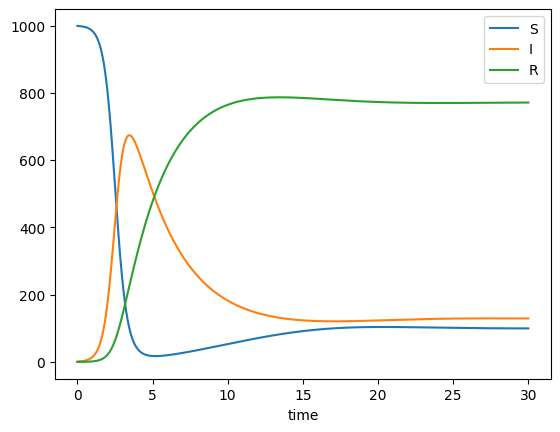

In [11]:
plt.plot(t,x_S,label='S')
plt.plot(t,x_I,label='I')
plt.plot(t,x_R,label='R')
plt.legend()
plt.xlabel('time')
#plt.savefig('SIR_solution.pdf')
plt.show()

We can immediately see the impact of our modified terms, even with a small value for `lambda_` of `0.05`.

[1] Borriello, E. (n.d.). Module 3 - Systems of ODEs with SciPy [Jupyter Notebook]. GitHub. Retrieved August 22, 2025, from https://github.com/EnricoBorriello/CAS522_Dynamical_Systems_didactic_material/blob/main/Module%203%20-%20Systems%20of%20ODEs%20with%20SciPy.ipynb
